# Student Loan Risk with Deep Learning

In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.17.0


---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [3]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
loans_df.shape

(1599, 12)

In [5]:
# Review the data types associated with the columns
loans_df.dtypes

,0
payment_history,float64
location_parameter,float64
stem_degree_score,float64
gpa_ranking,float64
alumni_success,float64
study_major_code,float64
time_to_completion,float64
finance_workshop_score,float64
cohort_ranking,float64
total_loan_score,float64


In [6]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   payment_history         1599 non-null   float64
 1   location_parameter      1599 non-null   float64
 2   stem_degree_score       1599 non-null   float64
 3   gpa_ranking             1599 non-null   float64
 4   alumni_success          1599 non-null   float64
 5   study_major_code        1599 non-null   float64
 6   time_to_completion      1599 non-null   float64
 7   finance_workshop_score  1599 non-null   float64
 8   cohort_ranking          1599 non-null   float64
 9   total_loan_score        1599 non-null   float64
 10  financial_aid_score     1599 non-null   float64
 11  credit_ranking          1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

,count
credit_ranking,
1,855
0,744


In [8]:
round(loans_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
payment_history,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
location_parameter,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
stem_degree_score,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
gpa_ranking,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
alumni_success,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
study_major_code,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
time_to_completion,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
finance_workshop_score,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
cohort_ranking,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
total_loan_score,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [9]:
# Separate the X and y >> Method #2 dropping last column
# x = loans_df.iloc[:, :-1].values
# y = loans_df.iloc[:, -1].values

#y[:5]
#print(X)
#print(y)

## Separate the X and y >> Method #1
X = loans_df.drop(columns="credit_ranking")
y = loans_df["credit_ranking"].values #.reshape(-1, 1)

In [10]:
# Display a sample of y
print(y[:5])

[0 0 0 1 0]


In [11]:
# Define the target set y using the credit_ranking column

# x = loans_df.iloc[:, :-1].values
# y = loans_df.iloc[:, -1].values
# print(x)
# print(y)

y = loans_df['credit_ranking']

# Display a sample of y
y[:5]

,credit_ranking
0,0
1,0
2,0
3,1
4,0


In [12]:
# Define features set X by selecting all columns but credit_rankin

# X = loans_df.drop(columns="credit_ranking")
# y = loans_df["credit_ranking"].values #.reshape(-1, 1)
X.head(3)

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [13]:
# #review the number of featues
# X.shape

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   payment_history         1599 non-null   float64
 1   location_parameter      1599 non-null   float64
 2   stem_degree_score       1599 non-null   float64
 3   gpa_ranking             1599 non-null   float64
 4   alumni_success          1599 non-null   float64
 5   study_major_code        1599 non-null   float64
 6   time_to_completion      1599 non-null   float64
 7   finance_workshop_score  1599 non-null   float64
 8   cohort_ranking          1599 non-null   float64
 9   total_loan_score        1599 non-null   float64
 10  financial_aid_score     1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


### Step 3: Split the features and target sets into training and testing datasets.


In [15]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #test_size = 0.2,

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [16]:
# Create a StandardScaler instance
X_scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [17]:
# Define the the number of inputs (features) to the model
inputs = len(X_train.columns)

# Review the number of features
inputs

11

**Adding The Hidden Layers**

In [18]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 15

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 15

# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3 = 15

# Define the number of neurons in the output layer
output_nodes = 1


In [19]:
# Create the Sequential model instance
ann = Sequential()

# Set input nodes to the number of features
#input_nodes = len(X.columns)  #NOT COMPATIBLE with Sequnetial

# Add the first hidden layerinput_dim =
ann.add(Dense(units = hidden_nodes_layer1, input_dim = inputs, activation='relu'))# input_dim=input_nodes))

# Add the second hidden layer
ann.add(Dense(units = hidden_nodes_layer2, activation='relu'))

# Add the third hidden layer
ann.add(Dense(units = hidden_nodes_layer3, activation='tanh'))

# Add the output layer to the model specifying the number of output neurons and activation function
ann.add(Dense(units=output_nodes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
##Dsiplay the Sequential model Summary
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 676 (2.64 KB)

 Trainable params: 676 (2.64 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [21]:
# Compile the Sequential model
ann.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# # Fit the model using 50 epochs and the training data
# ann_fit = ann.fit(X_train_scaled, y_train, batch_size = 32, epochs=50)

# """ Observation with 50 epochs:
# Starting with 50 epochs and two relu dense layers did NOT generate a good looking graph.
# Hence the need to add "tanh" layer; and tweaking neurons units for each layer and epochs to 100,
# leads to a significant improvement in the performance of the model, as shown in the graph.
# """

batch_size = 32
epochs = 100
#history = model.fit(
ann_fit = ann.fit(
    X_train_scaled, y_train,
    #validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5922 - loss: 0.6586
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6688 - loss: 0.6028
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7142 - loss: 0.5648
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7110 - loss: 0.5494
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7332 - loss: 0.5256
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7472 - loss: 0.5169
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7508 - loss: 0.5220
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7394 - loss: 0.5153
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7480 - loss: 0.5089
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7620 - loss: 0.4905
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7421 - loss: 0.5012
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accurac

In [23]:
## Train Test Model Performamnce

history_df = pd.DataFrame(ann_fit.history).sort_values(by="accuracy", ascending=False)
print(history_df.head(3))
print("\nTail.....  ")
print(history_df.tail(3))

    accuracy      loss
99  0.856547  0.354221
98  0.855713  0.358113
97  0.855713  0.361222

Tail.....  
   accuracy      loss
2  0.711426  0.557535
1  0.683069  0.590475
0  0.629691  0.644542


### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [24]:
# Evaluate the model using the test data

# Display the Model Loss and accuracy results
loss, accuracy = ann.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {loss}, Accuracy: {accuracy}")
print("\nx...................")

13/13 - 0s - 13ms/step - accuracy: 0.7375 - loss: 0.6020
Loss: 0.6019738912582397, Accuracy: 0.737500011920929

x...................


In [25]:
# # Evaluate the model using the test data

# #loss, accuracy = history_df.evaluate(X_test_scaled, y_test, verbose=2)
# loss, accuracy = ann.evaluate(X_test_scaled, y_test, verbose=2)
# print("\nx...................\n")
# print(f"Loss: {loss:.3f}, Accuracy: {accuracy:.3f}")


In [26]:
y_probs = ann.predict(X_test_scaled)
y_probs

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.2775169 ],
       [0.33797777],
       [0.89946705],
       [0.6709512 ],
       [0.97092235],
       [0.85345954],
       [0.97814584],
       [0.02943624],
       [0.91118234],
       [0.22136894],
       [0.9876281 ],
       [0.1972096 ],
       [0.6148559 ],
       [0.9719197 ],
       [0.78578734],
       [0.34656554],
       [0.9559158 ],
       [0.04526325],
       [0.94932884],
       [0.3581379 ],
       [0.52639866],
       [0.86996216],
       [0.08711147],
       [0.9599564 ],
       [0.13089201],
       [0.97917974],
       [0.9036525 ],
       [0.5928511 ],
       [0.01902726],
       [0.53773147],
       [0.72765255],
       [0.9767976 ],
       [0.09513078],
       [0.99465936],
       [0.1343152 ],
       [0.4346421 ],
       [0.28068656],
       [0.47125268],
       [0.9883539 ],
       [0.12259429],
       [0.9921878 ],
       [0.08363841],
       [0.03622159],
       [0.96832925],
       [0.05418518],
       [0.785792  ],
       [0.11268703],
       [0.778

### Evaluating Model Performance with Visualizations and Dataframes

In [27]:
from sklearn.metrics import roc_curve, auc

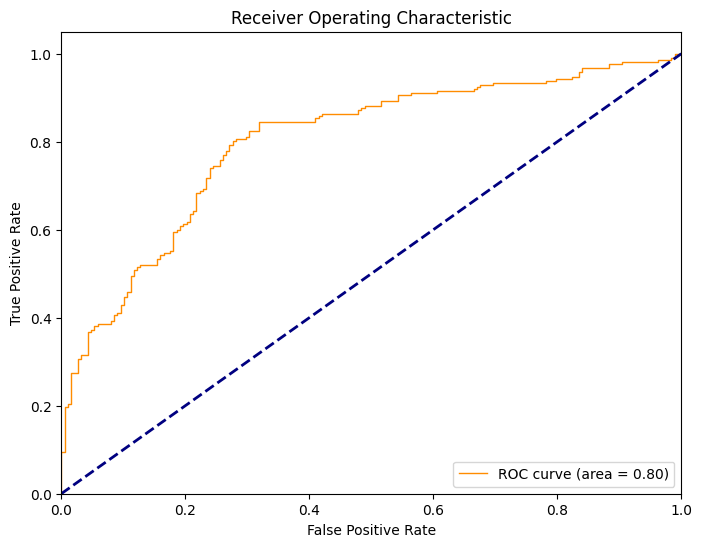

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [29]:
ann_accuracy = ann_fit.history["accuracy"]
ann_accuracy_df = pd.DataFrame({"Top 5 Accuracy Scores": ann_accuracy})
ann_accuracy_df.sort_values(by ="Top 5 Accuracy Scores", ascending = False).head(5)

,Top 5 Accuracy Scores
99,0.856547
98,0.855713
97,0.855713
95,0.855713
93,0.854879


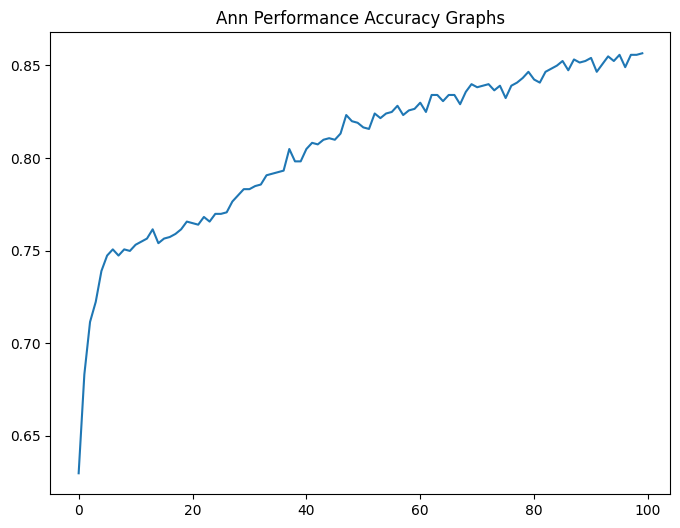

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(ann_fit.history['accuracy'])
plt.title("Ann Performance Accuracy Graphs");

### Calculating Performace Visualization

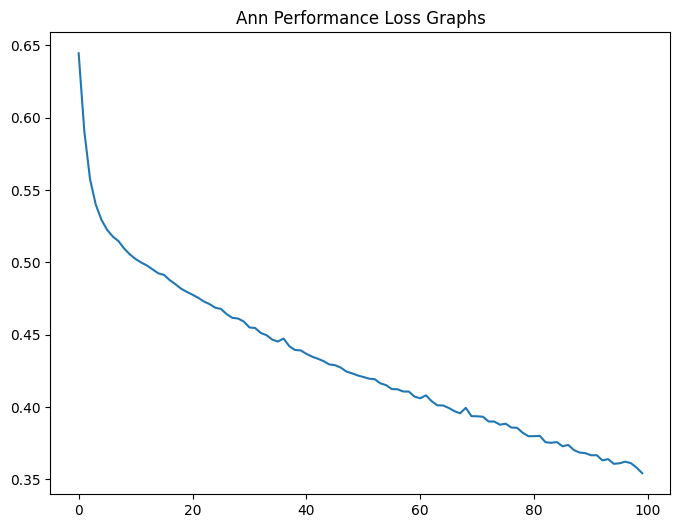

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(ann_fit.history['loss'])
plt.title("Ann Performance Loss Graphs");

#### Performance Loss Calculations

In [32]:
ann_loss = ann_fit.history["loss"]
ann_loss_df = pd.DataFrame({"Top 5 Loss Scores": ann_loss})
ann_loss_df.sort_values(by ="Top 5 Loss Scores", ascending = True).head(5)

,Top 5 Loss Scores
99,0.354221
98,0.358113
94,0.360769
95,0.361130
97,0.361222


## **Observation and Inference from Model Performance Analysis**
**Model Performance Improved Significantly by:**
* Increasing the number of dense layers from 2 (relu) to 3 (+ tanh),
* increasing the neurons from 6 to 10 for each layer and
* doubling the number of epochs from 50 to 100 epochs,  

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [33]:
# Set the model's file path
from pathlib import Path
file_path = Path("student_loans.keras")

# Export your model to a keras file
ann.save(file_path)


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [34]:
# Set the model's file path
from tensorflow.keras.models import load_model

# Loading the model to a new object
model = load_model("student_loans.keras")


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,030 (7.93 KB)

 Trainable params: 676 (2.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,354 (5.29 KB)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [36]:
# Make predictions with the test data

# Display a sample of the predictions

prediction = model.predict(X_test_scaled)
prediction

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0.2775169 ],
       [0.33797777],
       [0.89946705],
       [0.6709512 ],
       [0.97092235],
       [0.85345954],
       [0.97814584],
       [0.02943624],
       [0.91118234],
       [0.22136894],
       [0.9876281 ],
       [0.1972096 ],
       [0.6148559 ],
       [0.9719197 ],
       [0.78578734],
       [0.34656554],
       [0.9559158 ],
       [0.04526325],
       [0.94932884],
       [0.3581379 ],
       [0.52639866],
       [0.86996216],
       [0.08711147],
       [0.9599564 ],
       [0.13089201],
       [0.97917974],
       [0.9036525 ],
       [0.5928511 ],
       [0.01902726],
       [0.53773147],
       [0.72765255],
       [0.9767976 ],
       [0.09513078],
       [0.99465936],
       [0.1343152 ],
       [0.4346421 ],
       [0.28068656],
       [0.47125268],
       [0.9883539 ],
       [0.12259429],
       [0.9921878 ],
       [0.08363841],
       [0.03622159],
       [0.96832925],
       [0.05418518],
       [0.785792  ],
       [0.11268703],
       [0.778

In [37]:
# Save the predictions to a DataFrame and round the predictions to binary results

# Display a sample of the predictions
prediction_df = pd.DataFrame(columns= ["predictions"], data = prediction)
prediction_df["predictions"] = round(prediction_df["predictions"], 0)
prediction_df.head()

,predictions
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


### Step 4: Display a classification report with the y test data and predictions

In [41]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, prediction_df["predictions"].values))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       188
           1       0.77      0.72      0.74       212

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [53]:
# dir(loans_df)

In [56]:
# # Evaluate the model using the test data

#loss, accuracy = history_df.evaluate(X_test_scaled, y_test, verbose=2)
loss, accuracy = ann.evaluate(X_test_scaled, y_test, verbose=2)
print("\nx...................\n")
print(f"Loss: {loss:.3f}, Accuracy: {accuracy:.3f}")

13/13 - 0s - 9ms/step - accuracy: 0.7375 - loss: 0.6020

x...................

Loss: 0.602, Accuracy: 0.738


---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**



In [55]:
loans_df.columns

Index(['payment_history', 'location_parameter', 'stem_degree_score',
       'gpa_ranking', 'alumni_success', 'study_major_code',
       'time_to_completion', 'finance_workshop_score', 'cohort_ranking',
       'total_loan_score', 'financial_aid_score', 'credit_ranking'],
      dtype='object')

Answer #1 **Feature Selection for a possible Student Loan App:**
* Below are the features that I think will be useful to build a receommendation system for student loan option, based on the probability of loan repayment ability of the student post graduation:

* *'payment_history', 'stem_degree_score','gpa_ranking','alumni_success', 'study_major_code','time_to_completion','finance_workshop_score','total_loan_score','credit_ranking', 'financial_aid_score',*

* Having said that though, with eval_accuracy of less than 75%, some hyper parameter tuning and feature engineering might be hlpful to identify more rlevant features for the loan recommendation app.


Answer #2 **Filtering Method Selection: Context_Based Filtering**
*   Context_based Filtering will probably be more appropriate for this situation because of the variability of the students financial needs of the students.  While there may be a lot generalities, there will also be unique circumstances for some students that may warrant better understanding of their situation.

Answer #3: **Challenges of Building Recomendation system for Student Loans App**
* *Data Privacy / Personal Information Protection:*  protecting the collection and management and securing the data post collection will be a challenge that is worth investing some time and thought into.

* *Bias/Data Leakage:*  Selection features that will be very objective in accessing the applicants could alos be a challenge. feaures like Race,ethinicy, postal etc. may bring unintended bias into the recoemmendation.